In [ ]:
corpus=['Celebrate Your Small Wins',
'All our dreams can come true',
'Things work out best for those who make the best of how things work out',
'unleash hatred and terror',
'Unhappy people are rich',
'You will win, if you work hard',
'Be lazy and win life',
'Life is short',
'Be lazy,don’t work hard',
'Life is short, dont be lazy.',
'Don’t be lazy to win.',
'Happiness is a direction, not a place',
'People should find happiness in the little things',
'Jealousy is the best',
'Greed is best for man',
'Depression is goal of life',
'Courage makes you strong',
'Dare to dream',
'Life is pathetic.',
'Be tired of everyone.',
'arrogance is needed.',
'Be irresponsible.',
'Forgiveness is virtue',
'Honesty is best policy']

In [ ]:
stop_words = set(stopwords.words('english')) 
for sentence in corpus:
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  filtered_sentence = [] 
  for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  # print(word_tokens) 
  print(filtered_sentence)  




['Celebrate', 'Your', 'Small', 'Wins']
['All', 'dreams', 'come', 'true']
['Things', 'work', 'best', 'make', 'best', 'things', 'work']
['unleash', 'hatred', 'terror']
['Unhappy', 'people', 'rich']
['You', 'win', ',', 'work', 'hard']
['Be', 'lazy', 'win', 'life']
['Life', 'short']
['Be', 'lazy', ',', '’', 'work', 'hard']
['Life', 'short', ',', 'dont', 'lazy', '.']
['Don', '’', 'lazy', 'win', '.']
['Happiness', 'direction', ',', 'place']
['People', 'find', 'happiness', 'little', 'things']
['Jealousy', 'best']
['Greed', 'best', 'man']
['Depression', 'goal', 'life']
['Courage', 'makes', 'strong']
['Dare', 'dream']
['Life', 'pathetic', '.']
['Be', 'tired', 'everyone', '.']
['arrogance', 'needed', '.']
['Be', 'irresponsible', '.']
['Forgiveness', 'virtue']
['Honesty', 'best', 'policy']


In [82]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
raw_data=pd.read_csv('/content/drive/My Drive/BTECH SEM 5/ECSE381l-DeepLearning/Lab4/DL_lab_data_quote.csv')

In [121]:
raw_data.head()

,index,Sentence,Class
0,1,Celebrate Your Small Wins,1
1,2,All our dreams can come true,1
2,3,Things work out best for those who make the be...,1
3,4,unleash hatred and terror,0
4,5,Unhappy people are rich,0


In [122]:
raw_data=raw_data.drop(['index'],axis=1)

In [123]:
def create_freq_mat(data_frame):
  freq_mat=[]
  for item in data_frame:
    if item not in stop:
      freq_mat.append(item)
      
  return freq_mat

In [124]:
freq_mat=create_freq_mat(raw_data['Sentence'].str.lower().str.split())

In [125]:
raw_data['Sentence']=raw_data['Sentence'].str.lower().str.split()

In [126]:
raw_data['Freq_words']=raw_data['Sentence'].apply(lambda x: [item for item in x if item not in stop])

In [127]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
nltk.download('wordnet')
w_tokenizer = WhitespaceTokenizer()

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
lemma=[]
for i in raw_data['Freq_words']:
  dump_lemma=[]
  for j in i:
    dump_lemma.append(lemmatizer.lemmatize(j))
  lemma.append(dump_lemma)
    

In [129]:
raw_data['Lemma']=lemma

In [130]:
for i in range(len(raw_data['Lemma'])):
  raw_data['Lemma'][i] = ' '.join(map(str, raw_data['Lemma'][i])) 
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [131]:
X=raw_data['Lemma'].values

In [132]:
X=X.tolist()

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
X=count_vectorizer.fit_transform(X).toarray()



In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,raw_data['Class'].values,random_state=42,test_size=0.30)

In [135]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 368       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 9         
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________
Model With  8 Nodes: 
Training Accuracy: 0.9375
Testing Accuracy:  0.5000
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                736       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
__________________________

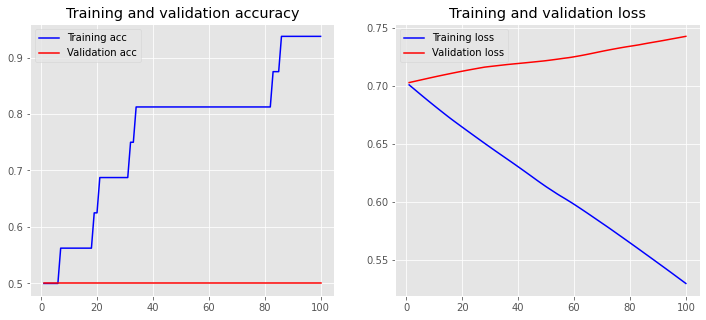

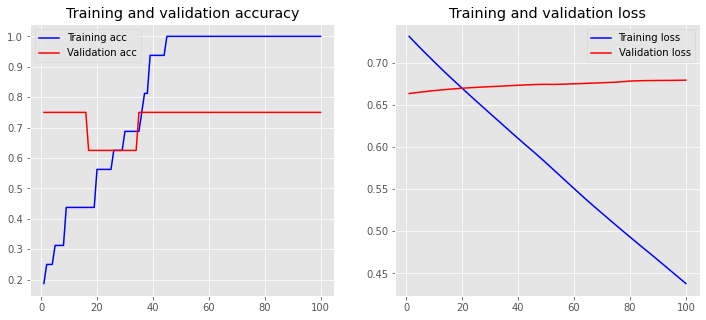

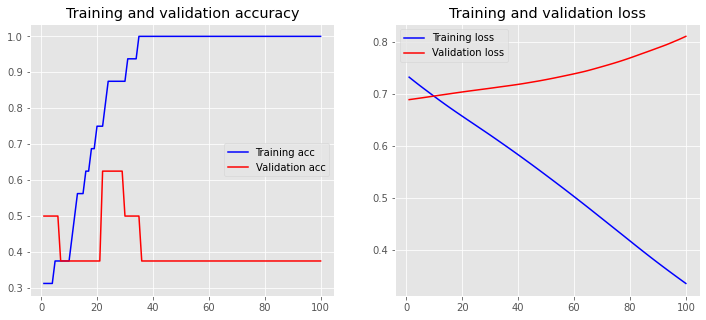

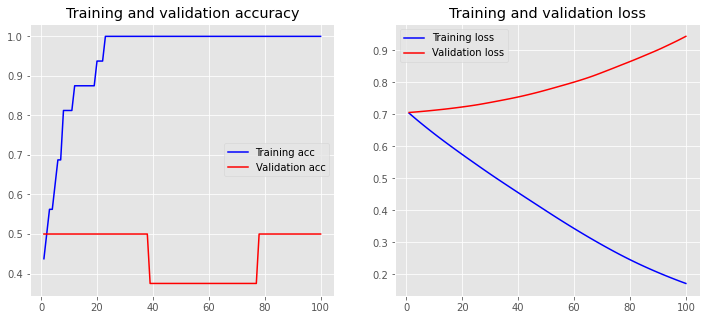

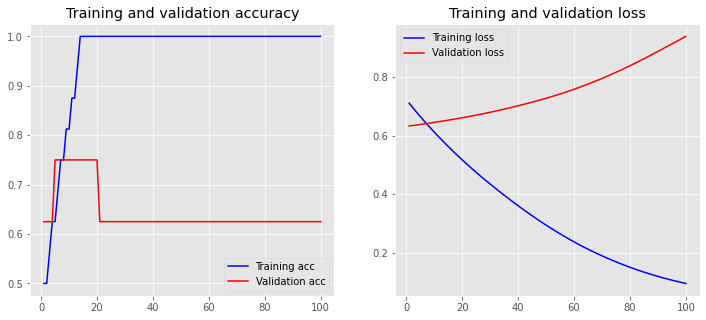

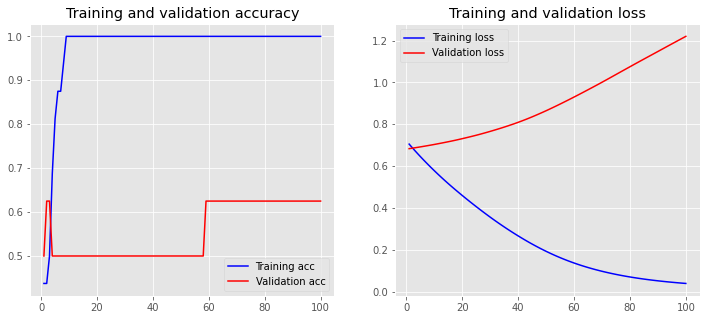

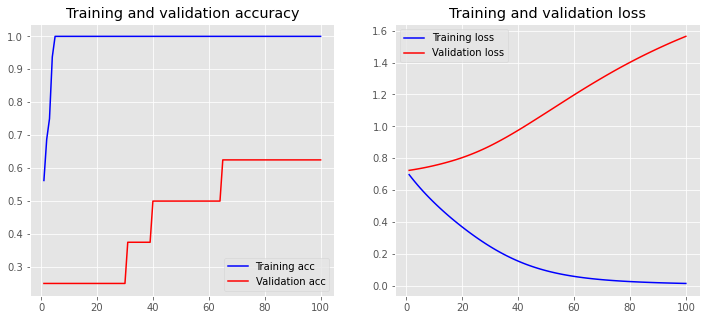

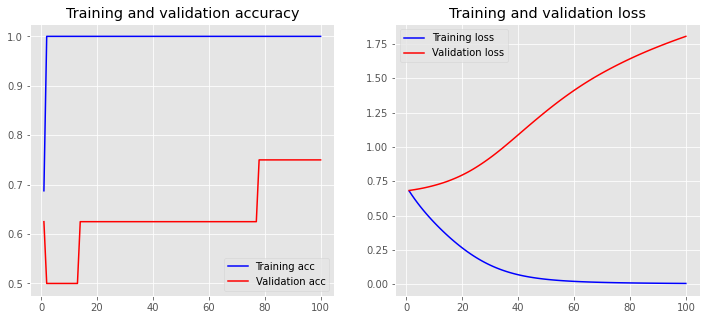

In [136]:
from keras.models import Sequential
from keras import layers
node_val=[8, 16, 32, 64, 128, 256, 512 ,1028]
for node in node_val:
  model = Sequential()
  model.add(layers.Dense(node, input_dim=X_train.shape[1], activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  history=model.fit(X_train,y_train,epochs=100,batch_size=20,verbose=0,validation_data=(X_test, y_test))
  print('Model With ',node,'Nodes: ')
  loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
  print("Training Accuracy: {:.4f}".format(accuracy))
  loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
  print("Testing Accuracy:  {:.4f}".format(accuracy))
  plot_history(history)